In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: cd to my drive

%cd /content/drive/MyDrive/courses/cse519/data/


/content/drive/MyDrive/courses/cse519/data


In [ ]:
import pandas as pd


df = pd.read_csv('one-million-reddit-jokes.csv')


print(df.head())



   type      id subreddit.id subreddit.name  subreddit.nsfw  created_utc  \
0  post  ftbp1i        2qh72          jokes           False   1585785543   
1  post  ftboup        2qh72          jokes           False   1585785522   
2  post  ftbopj        2qh72          jokes           False   1585785508   
3  post  ftbnxh        2qh72          jokes           False   1585785428   
4  post  ftbjpg        2qh72          jokes           False   1585785009   

                                           permalink      domain  url  \
0  https://old.reddit.com/r/Jokes/comments/ftbp1i...  self.jokes  NaN   
1  https://old.reddit.com/r/Jokes/comments/ftboup...  self.jokes  NaN   
2  https://old.reddit.com/r/Jokes/comments/ftbopj...  self.jokes  NaN   
3  https://old.reddit.com/r/Jokes/comments/ftbnxh...  self.jokes  NaN   
4  https://old.reddit.com/r/Jokes/comments/ftbjpg...  self.jokes  NaN   

                                            selftext  \
0  My corona is covered with foreskin so it is n

In [ ]:
print(df.info())

# List all columns
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   type            1000000 non-null  object
 1   id              1000000 non-null  object
 2   subreddit.id    1000000 non-null  object
 3   subreddit.name  1000000 non-null  object
 4   subreddit.nsfw  1000000 non-null  bool  
 5   created_utc     1000000 non-null  int64 
 6   permalink       1000000 non-null  object
 7   domain          1000000 non-null  object
 8   url             4472 non-null     object
 9   selftext        995485 non-null   object
 10  title           1000000 non-null  object
 11  score           1000000 non-null  int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 84.9+ MB
None
Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'domain', 'url', 'selftext', 'title',
       'score'],
      dtype='obj

In [ ]:
# Check for missing values in 'title' and 'selftext'
print(df[['title', 'selftext']].isnull().sum())

# Fill NaN values with empty strings
df['title'] = df['title'].fillna('')
df['selftext'] = df['selftext'].fillna('')

# Remove entries where both 'title' and 'selftext' are empty
df = df[~((df['title'].isin(['', '[removed]', '[deleted]'])) |
          (df['selftext'].isin(['', '[removed]', '[deleted]'])))]




title          0
selftext    4515
dtype: int64


In [ ]:
print(f"\n\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")



Dataset contains 574120 rows and 12 columns.


In [ ]:


# Keep only the 'selftext', 'title', and 'score' columns
df = df[['selftext', 'title', 'score', 'created_utc']]

print(df.head())

                                             selftext  \
0   My corona is covered with foreskin so it is no...   
1                          It's called Google Sheets.   
2   The vacuum doesn't snore after sex.\n\n&amp;#x...   
7                                         Oo..lala...   
10  Yo momma's so fat, that when she went to the z...   

                                                title  score  created_utc  
0                I am soooo glad I'm not circumcised!      2   1585785543  
1   Did you know Google now has a platform for rec...      9   1585785522  
2   What is the difference between my wife and my ...     15   1585785508  
7   What did the French man say to the attractive ...      2   1585784461  
10                                            Yo Mama      0   1585784081  


In [ ]:
# prompt: save df


df.to_csv('jokes.csv', index=False)

In [ ]:
# Combine 'title' and 'selftext' into 'joke_text'
df['joke_text'] = df['title'].astype(str) + ' ' + df['selftext'].astype(str)

In [ ]:
duplicate_rows = df[df.duplicated(subset=['joke_text'], keep=False)]

# Print the first few duplicate jokes (e.g., 5)
print(duplicate_rows[['joke_text']].head(10))


                                             joke_text
197  What do you call a nut that gets good grades? ...
211  What do you call a nut that gets good grades? ...
213             Can February March? No, but April May.
272  Farmer Joe's bull breaks down the barbed wire ...
406  A man visits a wise man and meets his three da...
462  The spoon in a waiter's pocket catches the cus...
555  Why did the monkey fall out of the tree? becau...
672  What's worse than lobsters on your piano? Crab...
938  A mother Galapagos Finch has two chicks. One d...
966  Yesterday I saw an ad that said "radio for sal...


In [ ]:
# Remove duplicates based on the 'joke_text' column
df.info()

df = df.drop_duplicates(subset='joke_text',keep='first')
print("DF after removing duplicate\n")
df.info()
# Reset index after dropping duplicates
df = df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Index: 574120 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   selftext     574120 non-null  object
 1   title        574120 non-null  object
 2   score        574120 non-null  int64 
 3   created_utc  574120 non-null  int64 
 4   joke_text    574120 non-null  object
dtypes: int64(2), object(3)
memory usage: 26.3+ MB
DF after removing duplicate

<class 'pandas.core.frame.DataFrame'>
Index: 561488 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   selftext     561488 non-null  object
 1   title        561488 non-null  object
 2   score        561488 non-null  int64 
 3   created_utc  561488 non-null  int64 
 4   joke_text    561488 non-null  object
dtypes: int64(2), object(3)
memory usage: 25.7+ MB


In [ ]:
df.to_csv('jokes_after_drop.csv', index=False)

In [ ]:
# prompt: read jokes_after_drop into df

import pandas as pd


df = pd.read_csv('jokes_after_drop.csv')
print(df.head())

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=e37887aa256cff2347917b025decd8359d101f3bcb02e8236375c0c6de5bd608
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install transformers torch

from transformers import pipeline
import torch

# Load multilingual language detection model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
language_model = pipeline("text-classification", model="papluca/xlm-roberta-base-language-detection", device=0)

# Apply language detection
def detect_language_transformers(text):
    try:
        result = language_model(text[:512])[0]  # Truncate text to 512 tokens
        return result['label']  # Return detected language
    except Exception:
        return 'unknown'

# Detect language with GPU acceleration
df['language'] = df['joke_text'].apply(detect_language_transformers)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# prompt: save df

df.to_csv('jokes_with_language.csv', index=False)

In [ ]:
# prompt: read jokes with language
import pandas as pd
# Assuming 'jokes_with_language.csv' is in the same directory as the current notebook
# or provide the correct path
df = pd.read_csv('jokes_with_language.csv')
print(df.head())

                                            selftext  \
0  My corona is covered with foreskin so it is no...   
1                         It's called Google Sheets.   
2  The vacuum doesn't snore after sex.\n\n&amp;#x...   
3                                        Oo..lala...   
4  Yo momma's so fat, that when she went to the z...   

                                               title  score   created_utc  \
0               I am soooo glad I'm not circumcised!    2.0  1.585786e+09   
1  Did you know Google now has a platform for rec...    9.0  1.585786e+09   
2  What is the difference between my wife and my ...   15.0  1.585786e+09   
3  What did the French man say to the attractive ...    2.0  1.585784e+09   
4                                            Yo Mama    0.0  1.585784e+09   

                                           joke_text language  
0  I am soooo glad I'm not circumcised! My corona...       en  
1  Did you know Google now has a platform for rec...       en  
2  What 

In [ ]:


import pandas as pd


df1 = pd.read_csv('jokes_with_language.csv')


from transformers import pipeline


# Filter for English jokes with non-empty text
filtered_df = df1[(df1['language'] == 'en') & (df1['joke_text'].notnull())].copy()

# Select a smaller subset for testing
subset = filtered_df.head(100000)  # Use first 100000 rows

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)  # Use GPU if available

# Define labels
candidate_labels = ["joke", "not a joke"]

# Apply classification to the subset
def classify_joke(text):
    try:
        result = classifier(text, candidate_labels)
        return result['labels'][0]  # Return the top predicted label
    except Exception as e:
        print(f"Error processing text: {text[:50]}... | Error: {e}")
        return "unknown"

subset['predicted_label'] = subset['joke_text'].apply(classify_joke)

subset.to_csv('labeled_jokes_subset.csv', index=False)
print("Labeled subset saved as labeled_jokes_subset.csv")


print(subset.head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
<ipython-input-4-5b86cbb317c7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['predicted_label'] = subset['joke_text'].apply(classify_joke)


Labeled subset saved as labeled_jokes_subset.csv
                                            selftext  \
0  My corona is covered with foreskin so it is no...   
1                         It's called Google Sheets.   
2  The vacuum doesn't snore after sex.\n\n&amp;#x...   
3                                        Oo..lala...   
4  Yo momma's so fat, that when she went to the z...   

                                               title  score   created_utc  \
0               I am soooo glad I'm not circumcised!    2.0  1.585786e+09   
1  Did you know Google now has a platform for rec...    9.0  1.585786e+09   
2  What is the difference between my wife and my ...   15.0  1.585786e+09   
3  What did the French man say to the attractive ...    2.0  1.585784e+09   
4                                            Yo Mama    0.0  1.585784e+09   

                                           joke_text language predicted_label  
0  I am soooo glad I'm not circumcised! My corona...       en      not 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data files (if not already installed)
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package

# Calculate word count for each joke
# Calculate joke length in words using word_tokenize
df['joke_length'] = df['joke_text'].apply(lambda x: len(word_tokenize(x)))

# Summary statistics
print(df['joke_length'].describe())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


count    942518.000000
mean         36.366737
std          83.726487
min           1.000000
25%          12.000000
50%          17.000000
75%          26.000000
max        9492.000000
Name: joke_length, dtype: float64


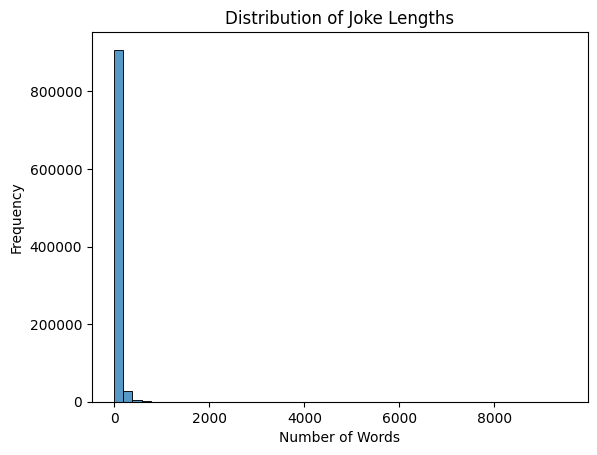

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['joke_length'], bins=50)
plt.title('Distribution of Joke Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

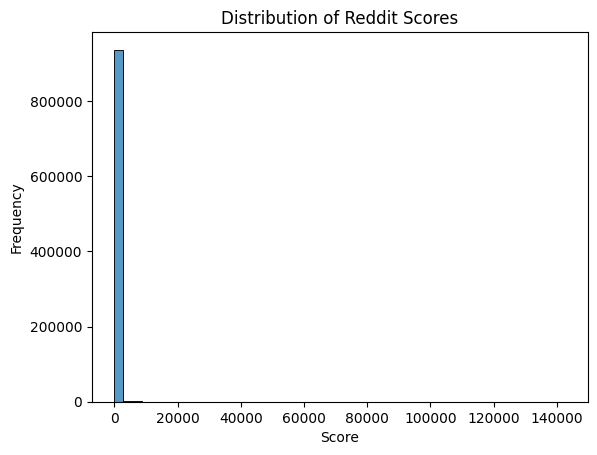

In [ ]:
sns.histplot(df['score'], bins=50)
plt.title('Distribution of Reddit Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

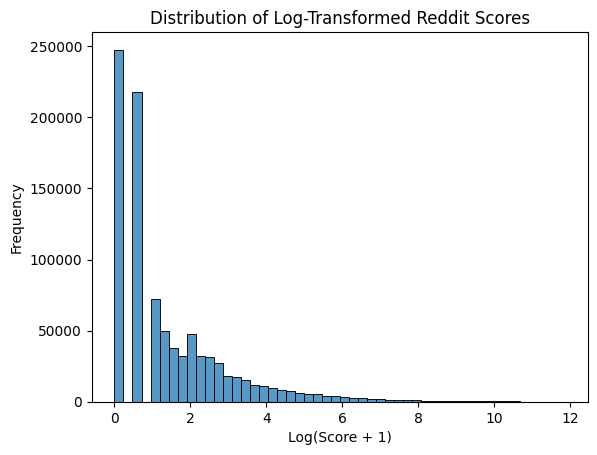

In [ ]:
import numpy as np

df['log_score'] = np.log1p(df['score'])  # Using log1p to handle zero scores
sns.histplot(df['log_score'], bins=50)
plt.title('Distribution of Log-Transformed Reddit Scores')
plt.xlabel('Log(Score + 1)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert Unix timestamp to datetime
df['timestamp'] = pd.to_datetime(df['created_utc'], unit='s')

# Extract year and month
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month


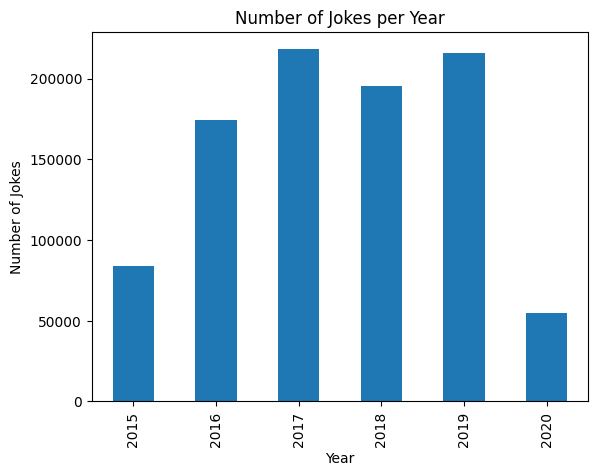

In [ ]:
jokes_per_year = df['year'].value_counts().sort_index()
jokes_per_year.plot(kind='bar')
plt.title('Number of Jokes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Jokes')
plt.show()

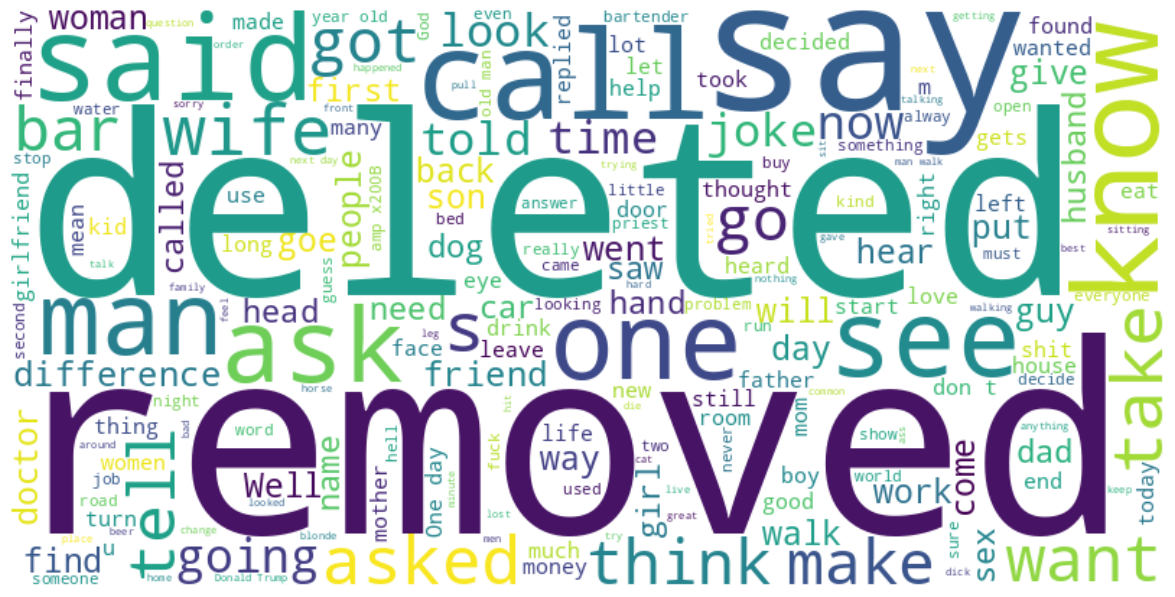

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all jokes into one string
text = ' '.join(df['joke_text'])

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n n-grams
def get_top_ngrams(corpus, ngram_range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 20 Bigrams
top_bigrams = get_top_ngrams(df['joke_text'], ngram_range=(2,2), n=20)
print("Top 20 Bigrams:")
for word, freq in top_bigrams:
    print(f"{word}: {freq}")

# Top 20 Trigrams
top_trigrams = get_top_ngrams(df['joke_text'], ngram_range=(3,3), n=20)
print("\nTop 20 Trigrams:")
for word, freq in top_trigrams:
    print(f"{word}: {freq}")

Top 20 Bigrams:
walks bar: 13597
did hear: 11089
don know: 9754
old man: 8793
amp x200b: 7982
year old: 7630
donald trump: 7630
man walks: 7303
man says: 6291
walk bar: 5640
ve got: 5067
knock knock: 4705
did know: 4339
joke removed: 4307
having sex: 4071
little johnny: 3985
guy says: 3861
man goes: 3805
st peter: 3781
bartender says: 3734

Top 20 Trigrams:
man walks bar: 3293
like women like: 1778
guy walks bar: 1755
loser loser loser: 1661
does change lightbulb: 1505
change light bulb: 1340
walks bar bartender: 1330
amp x200b amp: 1281
x200b amp x200b: 1281
women like like: 1236
walks bar removed: 1206
does change light: 1176
ping pong balls: 1162
pink ping pong: 1135
chicken cross road: 1133
bar bartender says: 1128
does screw lightbulb: 1084
movie besteducationpage removed: 1083
did chicken cross: 1072
walk bar removed: 1038


Duplicate

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
# Apply preprocessing to the 'joke_text' column
df['clean_joke_text'] = df['joke_text'].apply(preprocess_text)

In [ ]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def tokenize_and_stem(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and apply stemming
    words = [ps.stem(word) for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

In [ ]:
df['processed_joke_text'] = df['clean_joke_text'].apply(tokenize_and_stem)

In [ ]:

print(df['clean_joke_text'].info())
print(df['processed_joke_text'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 942518 entries, 0 to 942517
Series name: clean_joke_text
Non-Null Count   Dtype 
--------------   ----- 
942518 non-null  object
dtypes: object(1)
memory usage: 7.2+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 942518 entries, 0 to 942517
Series name: processed_joke_text
Non-Null Count   Dtype 
--------------   ----- 
942518 non-null  object
dtypes: object(1)
memory usage: 7.2+ MB
None


In [ ]:

total_jokes = len(df)
print(f"Total jokes before removing exact duplicates: {total_jokes}")

# Identify duplicate jokes
duplicates = df[df.duplicated(subset='processed_joke_text', keep=False)]
total_duplicates = len(duplicates)
print(f"Total duplicates found (including originals): {total_duplicates}")

# Group duplicates by the processed joke text
grouped_duplicates = duplicates.groupby('processed_joke_text')

# Display examples of duplicates
num_groups_to_display = 5  # Adjust this number as needed
count = 0
for name, group in grouped_duplicates:
    if count >= num_groups_to_display:
        break
    print(f"\nDuplicate Group {count+1}:")
    for idx, row in group.iterrows():
        print(f"Index {idx}:")
        print(f"Original Text:\n{row['joke_text']}\n")
    count += 1

# After verifying, proceed to remove duplicates
df = df.drop_duplicates(subset='processed_joke_text').reset_index(drop=True)

unique_jokes = len(df)
print(f"\nTotal jokes after removing exact duplicates: {unique_jokes}")
print(f"Number of exact duplicates removed: {total_jokes - unique_jokes}")

Total jokes before removing exact duplicates: 942518
Total duplicates found (including originals): 111100

Duplicate Group 1:
Index 13859:
Original Text:
... 

Index 21539:
Original Text:
L0L! 

Index 47260:
Original Text:
6+(6*9)+9= 69

Index 53903:
Original Text:
420 69

Index 56345:
Original Text:
‍ ‍ ‍ ‍

Index 58914:
Original Text:
😂 

Index 75013:
Original Text:
😳😳😳 

Index 80702:
Original Text:
She : We are over. He : We are what? Over.

Index 101484:
Original Text:
👌 

Index 108308:
Original Text:
10/10 

Index 112940:
Original Text:
This 

Index 115186:
Original Text:
422 = 420 Because 422 is 420 too

Index 130872:
Original Text:
Before was was was Was was is.

Index 137048:
Original Text:
Me 

Index 137361:
Original Text:
Me Me

Index 139812:
Original Text:
I 

Index 140559:
Original Text:
যে কারণে শুভশ্রীকে ঘৃণা করে দেব গোপন তথ্য ফাঁস করলেন নায়ক দেব [https://youtu.be/Phy9ifYfeXg](https://youtu.be/Phy9ifYfeXg)

Index 141162:
Original Text:
69 

Index 142895:
Original Text:
শ

In [ ]:
from collections import Counter
import re

# Combine all jokes into one string
all_text = ' '.join(df['joke_text'].tolist())

# Remove punctuation and make lowercase
all_text = re.sub(r'[^\w\s]', '', all_text).lower()

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove common stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Remove numeric tokens
tokens = [word for word in tokens if word.isalpha()]

# Count word frequencies
word_counts = Counter(tokens)

# Remove disallowed content (e.g., offensive words)
# For this example, we'll assume we have a list of disallowed words
disallowed_words = set(['list', 'of', 'disallowed', 'words'])
tokens = [word for word in tokens if word not in disallowed_words]

# Recount word frequencies after removing disallowed words
word_counts = Counter(tokens)

# Get the most common words
common_words = word_counts.most_common(20)

print('Most common words (excluding stopwords and disallowed content):')
for word, count in common_words:
    print(f'{word}: {count}')


<Figure size 1000x600 with 0 Axes>

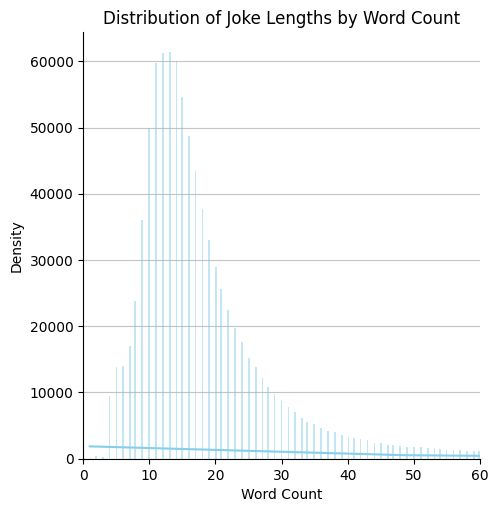

In [ ]:
#

import seaborn as sns

# Plot using seaborn's displot (kernel density estimate)
plt.figure(figsize=(10, 6))
sns.displot(df['word_count'], kde=True, color='skyblue')  # Use kde for density plot
plt.title('Distribution of Joke Lengths by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.xlim(0, 60)  # Adjust the x-axis limit if necessary
plt.grid(axis='y', alpha=0.75)
plt.show()
